In [1]:
import os 
import sys 
import json 
import glob 
import pandas as pd 

import numpy as np 
import matplotlib.pyplot as plt 
import MDAnalysis as mda 


In [2]:
from MDAnalysis.analysis import distances

In [3]:
# one_letter["SER"] will now return "S"
one_letter ={'VAL':'V', 'ILE':'I', 'LEU':'L', 'GLU':'E', 'GLN':'Q', \
'ASP':'D', 'ASN':'N', 'HIS':'H', 'TRP':'W', 'PHE':'F', 'TYR':'Y',    \
'ARG':'R', 'LYS':'K', 'SER':'S', 'THR':'T', 'MET':'M', 'ALA':'A',    \
'GLY':'G', 'PRO':'P', 'CYS':'C', 'HID':'H'}

In [4]:
pdbs = sorted(glob.glob("../../MD_sims/setup/*_*/*pdb")) 
tops = sorted(glob.glob("../../MD_sims/setup/*_*/*prmtop")) 

In [5]:
active_sites = [
    [35, 46, 65, 86, 88, 94, 134, 180, 202, 267, 285, 286, 
     341, 352, 371, 392, 394, 400, 440, 486, 508, 573, 591, 592,], 
    [33, 44, 63, 84, 86, 92, 132, 178, 200, 265, 283, 284, 
     336, 347, 366, 387, 389, 395, 435, 481, 503, 568, 586, 587], 
    [35, 46, 65, 89, 91, 97, 137, 183, 205, 268, 285, 286,
     336, 347, 366, 390, 392, 398, 438, 484, 506, 569, 586, 587]   
]
active_sites = np.array(active_sites) - 1 


active_range = [np.hstack([np.arange(30, 291), np.arange(336, 597)]), 
                np.hstack([np.arange(28, 289), np.arange(331, 592)]), 
                np.hstack([np.arange(30, 291), np.arange(331, 592)])
               ]

In [8]:
cm_maps = []
for x, y, pdb in zip(active_sites, active_range, pdbs[:]): 
    mda_traj = mda.Universe(pdb) 
    protein_ca = mda_traj.select_atoms('protein and name CA') 
#     print([one_letter[resname] for resname in protein_ca[ind].residues.resnames]) 
    cm = (distances.distance_array(protein_ca[x].positions, protein_ca[y].positions) < 8.0) * 1.0 
    cm_maps.append(cm) 

In [11]:
cm.shape

(24, 522)

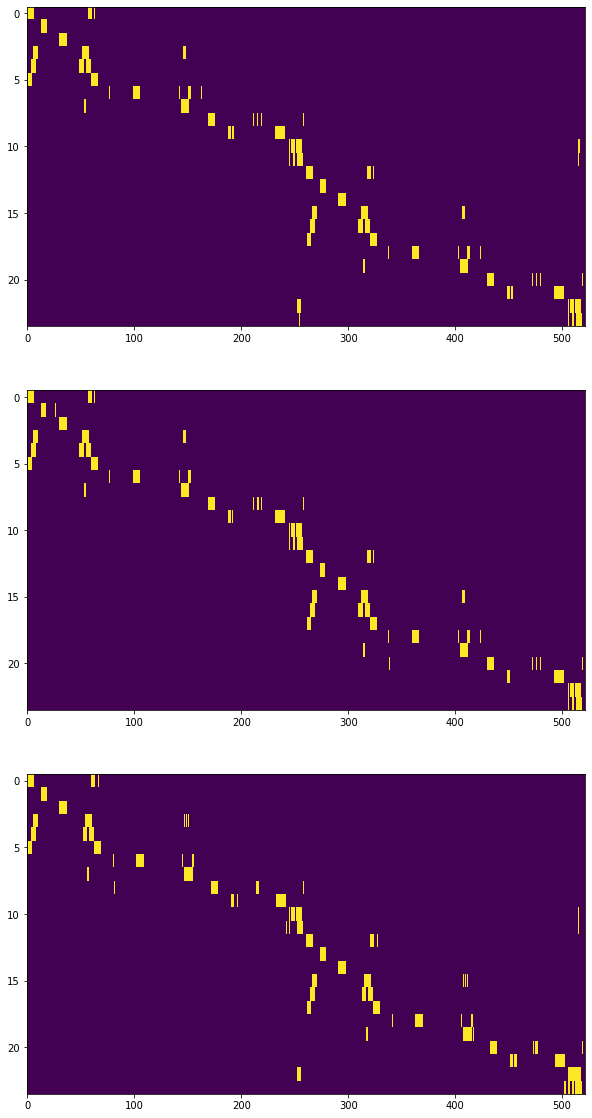

In [10]:
fig, axes = plt.subplots(3, 1, figsize=(10, 20)) 

for ax, cm in zip(axes, cm_maps): 
    ax.imshow(cm, interpolation='nearest')
    ax.set_aspect('auto')

In [19]:
type(x.tolist()[0])

int

In [21]:
for x, y, pdb in zip(active_sites, active_range, pdbs[:]): 
    json_res = os.path.basename(pdb)[:-3] + 'json'
    dict_res = {'x': x.tolist(), 'y': y.tolist()}
    json.dump(dict_res, open(json_res, 'w'))
    print(pdb, json_res)

../../MD_sims/setup/1_CoV/a_input.pdb a_input.json
../../MD_sims/setup/2_SARS/b_input.pdb b_input.json
../../MD_sims/setup/3_MERS/c_input.pdb c_input.json


In [15]:
type(dict_res)

dict